# Test Resampler Notebook

[**[Open in Colab]**](https://colab.research.google.com/github/hhoppe/resampler/blob/main/test_resampler_notebook.ipynb)
&nbsp; [**[GitHub source]**](https://github.com/hhoppe/resampler)

## Example Usage

In [1]:
!pip install -q mediapy resampler
import mediapy as media
import numpy as np
import resampler

4x6,128x192

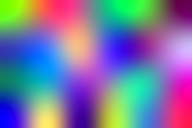

In [2]:
rng = np.random.default_rng(seed=1)
array = rng.random((4, 6, 3))  # 4x6 RGB image.
upsampled = resampler.resize(array, (128, 192))  # To 128x192 resolution.
media.show_images({'4x6': array, '128x192': upsampled}, height=128)

128x128,32x32

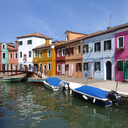
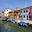

In [3]:
image = media.read_image('https://github.com/hhoppe/data/raw/main/image.png')
downsampled = resampler.resize(image, (32, 32))
media.show_images({'128x128': image, '32x32': downsampled}, height=128)

In [4]:
import matplotlib.pyplot as plt

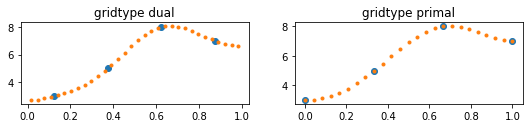

In [5]:
array = [3.0, 5.0, 8.0, 7.0]  # 4 source samples in 1D.
new_dual = resampler.resize(array, (32,))  # (default gridtype='dual') 8x resolution.
new_primal = resampler.resize(array, (25,), gridtype='primal')  # 8x resolution.

_, axs = plt.subplots(1, 2, figsize=(9, 1.5))
axs[0].set_title('gridtype dual')
axs[0].plot((np.arange(len(array)) + 0.5) / len(array), array, 'o')
axs[0].plot((np.arange(len(new_dual)) + 0.5) / len(new_dual), new_dual, '.')
axs[1].set_title('gridtype primal')
axs[1].plot(np.arange(len(array)) / (len(array) - 1), array, 'o')
axs[1].plot(np.arange(len(new_primal)) / (len(new_primal) - 1), new_primal, '.')
plt.show()

,,,,,,,,

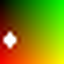
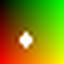
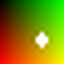
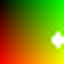

In [6]:
batch_size = 4
batch_of_images = media.moving_circle((16, 16), batch_size)
upsampled = resampler.resize(batch_of_images, (batch_size, 64, 64))

spacer = np.ones((64, 16, 3))
media.show_images([*batch_of_images, spacer, *upsampled], border=True, height=64)

In [7]:
media.show_videos({'original': batch_of_images, 'upsampled': upsampled}, fps=1, border=True)

"original <source src=""data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAA+FtZGF0AAACfgYF//963EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjPWNxcCBtYnRyZWU9MCBxcD0yMCBpcF9yYXRpbz0xLjQwIHBiX3JhdGlvPTEuMzAgYXE9MACAAAAAdGWIhAD/feG/QafKMUlOBmCnwSeV8TaWPllX9mYwLRT6sXFMpANEdUpywEteJ3yNcQvhy5hgqmI1zSdQQWwEZ05L7k+zDGVC9O7CeIGB1BxFd3eoV94V/4TcRfUScizasHSb7tUSTAWgXmJgoxCIu3eRoqiBAAAANkGaIWx/BNfL8AqP/viqgX8CDMh7v3rit/sYFOisKt7ypC5uhVP3JftcSTQyeC4VugYkzIOnvgAAAG5liIIAP33hvgMntt+xSU4GYKfBJ5XxNpY+WVf2ZjAtFPqxhq2wq9XJ2wihwBBNbMf9JozJK+J9nA4Lh4+Yu2AQJmBv5RXFFQlIrEJ1BxFkN4faUVeK+Nol1m+0pT4rcUKMDuMUGRAGOK12AyNf8QAAAC9BmiFsf2SOfAsd//8MTSlpDQJSdoJkJo2Y5bLSY+QwOfunGx7eJ2BlC62+p2BzMAAAA0Rtb292AAAAbG12aGQAAAAAAAAAAAAAAAAAAAPoAAAPoAABAAABAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACbnRyYWsAAABcdGtoZAAAAAMAAAAAAAAAAAAAAAEAAAAAAAAPoAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAEAAAAAAEAAAABAAAAAAACRlZHRzAAAAHGVsc3QAAAAAAAAAAQAAD6AAAIAAAAEAAAAAAeZtZGlhAAAAIG1kaGQAAAAAAAAAAAAAAAAAAEAAAAEAAFXEAAAAAAAtaGRscgAAAAAAAAAAdmlkZQAAAAAAAAAAAAAAAFZpZGVvSGFuZGxlcgAAAAGRbWluZgAAABR2bWhkAAAAAQAAAAAAAAAAAAAAJGRpbmYAAAAcZHJlZgAAAAAAAAABAAAADHVybCAAAAABAAABUXN0YmwAAACtc3RzZAAAAAAAAAABAAAAnWF2YzEAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAEAAQAEgAAABIAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAY//8AAAAzYXZjQwFkAAr/4QAWZ2QACqzZXoQAAAMABAAAAwAIPEiWWAEABmjr4bLIsP34+AAAAAAUYnRydAAAAAAAAAeyAAAHsgAAABhzdHRzAAAAAAAAAAEAAAAEAABAAAAAABhzdHNzAAAAAAAAAAIAAAABAAAAAwAAABhjdHRzAAAAAAAAAAEAAAAEAACAAAAAABxzdHNjAAAAAAAAAAEAAAABAAAABAAAAAEAAAAkc3RzegAAAAAAAAAAAAAABAAAAvoAAAA6AAAAcgAAADMAAAAUc3RjbwAAAAAAAAABAAAAMAAAAGJ1ZHRhAAAAWm1ldGEAAAAAAAAAIWhkbHIAAAAAAAAAAG1kaXJhcHBsAAAAAAAAAAAAAAAALWlsc3QAAAAlqXRvbwAAAB1kYXRhAAAAAQAAAABMYXZmNTguNzYuMTAw"" type=""video/mp4""/> This browser does not support the video tag.","upsampled <source src=""data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAABtFtZGF0AAACfgYF//963EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTIgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjPWNxcCBtYnRyZWU9MCBxcD0yMCBpcF9yYXRpbz0xLjQwIHBiX3JhdGlvPTEuMzAgYXE9MACAAAACAmWIhAD/47h/yqaJ5X558BqAcg7Hu4or2GArj/yT0HWEu138X7HY8qU6tsPgGO85iLYkGVkufR1LCfAcJldyHgoORSXUCz8S1J4zFwYrPAdKcQ6RTJSpCRh1MC/XPL9FdQxkvepWmpq9WSINbdyCJnuHaMf+MkzZK0fJlStHEvJIUGkbcjhere3e3xwT6qHGAbQlxLlk5PiSmw4w6QvVWADS+8XZ1cQshXOkQb6F1gP9DDrR4qHJI7pnI6HYdaZ2COSR3I2RJmnqPJoJSNjDaZb+VJ+aleTkKjB+qkqTA6QczlU2L45SqT6njXZ1JF88rE6wbL1uxfIz1G7BazuFXA9LCO/MPSebMtva7wAaPqQuJxzpf9XuYf0fgoRJsJexsJJPdzGt8odXFO7Y7uYA/utsgV812RzVUbkJ4

<!-- For Emacs:
Local Variables: *
fill-column: 100 *
End: *
-->